# 參數優化 - 將歷史報酬提升數倍的方式！

這個單元中，我們首先要來撰寫一個獲利的策略

寫一個策略，首先要來將我們之前爬到的數據拿出來



# (loadData)

In [7]:
import matplotlib.pyplot as plt
from data import Data

data = Data()
twii = data.get('發行量加權股價指數')
twii = twii[(twii.index.second == 0)]['台股指數'] #----->選擇1分K
twii.head()
# twii.plot()

date
2024-01-02 09:00:00    17930.81
2024-01-02 09:01:00    17940.64
2024-01-02 09:02:00    17951.18
2024-01-02 09:03:00    17944.70
2024-01-02 09:04:00    17943.66
Name: 台股指數, dtype: float64

# (bias分析)

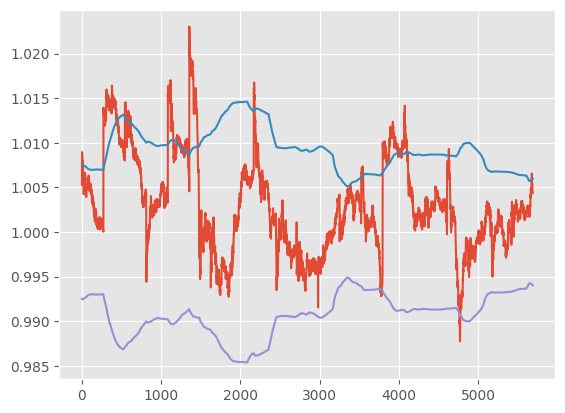

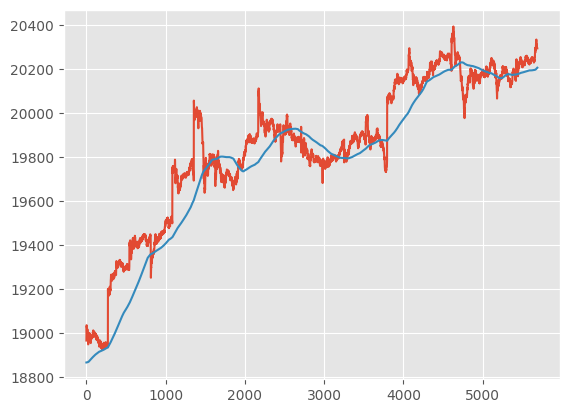

In [9]:
#(顯示乖離率標準差區間)
import matplotlib.pyplot as plt

sma = twii.rolling(500).mean()
bias = twii / sma
ub =1+ bias.rolling(1000).std() * 2
lb = 1 - bias.rolling(1000).std() * 2



plt.plot(bias['2024-03'].values)
plt.plot(ub['2024-03'].values)
plt.plot(lb['2024-03'].values)
plt.show()
plt.plot(twii['2024-03'].values)
plt.plot(sma['2024-03'].values)

# (bias策略)

C:\Users\user\AppData\Local\Temp\ipykernel_10424\960611273.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return creturn.dropna()[-1] #----->到目前total reward


1140.5899999999856

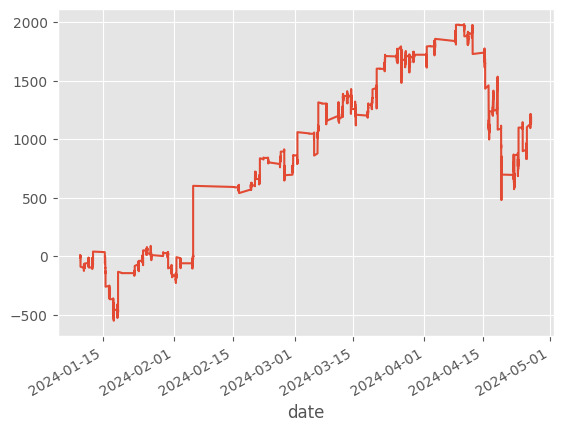

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def strategy(m1=500, m2=1000, m3=1, m4=1, draw_plot=False):
    
    #(均線與乖離)
    sma = twii.rolling(m1).mean()

    bias = (twii / sma)
    ub = 1 + bias.rolling(m2).std() * m3
    lb = 1 - bias.rolling(m2).std() * m4
    
    #(進出場點)
    buy = (bias > lb) 
    sell = (bias < ub) 

    hold = pd.Series(np.nan, index=twii.index) #----->持有時間
    hold[buy] = 0
    hold[sell] = 1
    hold = hold.ffill() 
    # hold.shift()
    
    #(淨損益計算)
    returns = twii.shift(-2) - twii.shift(-1)
    
    returns[hold == 0] = 0 #----->空手時不計算return
    returns -= hold.diff().abs() * 3 #----->計算手續費,滑價

    creturn = returns.cumsum() #----->每分鐘return累加
    
    
    
    
    if draw_plot:
        # (hold*1000).plot()
        creturn.plot()
    
     
    return creturn.dropna()[-1] #----->到目前total reward

    
strategy(draw_plot=True)

# (策略優化)

In [19]:
vmax = 0 #----->只找出最大creturn
for m1 in range(500, 2000, 200):
    for m2 in range(400, 800, 20):
        v = strategy(m1, m2, 1, 1)
        if v > vmax:
            vmax = v
            print(vmax, m1, m2, 1, 1)

C:\Users\user\AppData\Local\Temp\ipykernel_10424\960611273.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return creturn.dropna()[-1] #----->到目前total reward
C:\Users\user\AppData\Local\Temp\ipykernel_10424\960611273.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return creturn.dropna()[-1] #----->到目前total reward
C:\Users\user\AppData\Local\Temp\ipykernel_10424\960611273.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


787.0699999999852 500 400 1 1
915.8999999999578 500 420 1 1
1234.1099999999788 500 680 1 1
1279.840000000022 900 400 1 1


C:\Users\user\AppData\Local\Temp\ipykernel_10424\960611273.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return creturn.dropna()[-1] #----->到目前total reward
C:\Users\user\AppData\Local\Temp\ipykernel_10424\960611273.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return creturn.dropna()[-1] #----->到目前total reward
C:\Users\user\AppData\Local\Temp\ipykernel_10424\960611273.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


1367.3899999999994 900 780 1 1


C:\Users\user\AppData\Local\Temp\ipykernel_10424\960611273.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return creturn.dropna()[-1] #----->到目前total reward
C:\Users\user\AppData\Local\Temp\ipykernel_10424\960611273.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return creturn.dropna()[-1] #----->到目前total reward
C:\Users\user\AppData\Local\Temp\ipykernel_10424\960611273.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


## (繪製歷史報酬)

C:\Users\user\AppData\Local\Temp\ipykernel_10424\960611273.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return creturn.dropna()[-1] #----->到目前total reward


1367.3899999999994

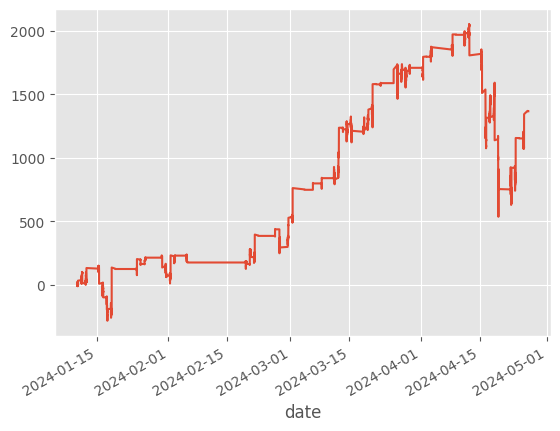

In [21]:
strategy(900, 780, 1, 1, draw_plot=True)